## Computing and Interpreting Statistics over a Linear Model.

### The Data
#### The leaning tower of Pisa is a major tourist attraction in Italy. It had been slowly leaning to one side for hundreds of years.
#### The datset consists of the tower's lean from 1975 to 1987.

      lean  year
0   2.9642  1975
1   2.9644  1976
2   2.9656  1977
3   2.9667  1978
4   2.9673  1979
5   2.9688  1980
6   2.9696  1981
7   2.9698  1982
8   2.9713  1983
9   2.9717  1984
10  2.9725  1985
11  2.9742  1986
12  2.9757  1987


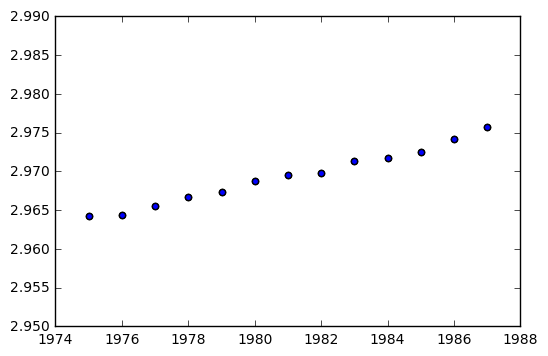

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

pisa = pd.DataFrame({"year" : range(1975, 1988),
                    "lean" : [2.9642, 2.9644, 2.9656, 2.9667, 2.9673, 2.9688, 2.9696,
                             2.9698, 2.9713, 2.9717, 2.9725, 2.9742, 2.9757]})

print(pisa)
plt.scatter(pisa["year"],pisa['lean'])
plt.show()

### Fit the Linear Model
#### Based on the scatter plot, we can easily see that regression looks to be a good fit for the data.
#### Statsmodels provide ample statistical measures for proper evaluation.
#### We will use OLS model (Ordinary Least Squares). It does not immediately add an intercept to our model. We can add a column of 1s to add another coefficient to our model and since it is multiplied with 1, we are given an intercept.

In [7]:
import statsmodels.api as sm

y = pisa.lean
X = pisa.year
X = sm.add_constant(X)

linear = sm.OLS(y, X)

linearfit = linear.fit()

print(linearfit.summary())

C:\Users\Aditya Gogoi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                   lean   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     904.1
Date:                Tue, 28 Feb 2017   Prob (F-statistic):           6.50e-12
Time:                        15:02:03   Log-Likelihood:                 83.777
No. Observations:                  13   AIC:                            -163.6
Df Residuals:                      11   BIC:                            -162.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.1233      0.061     18.297      0.0

### Defining the Linear Model
#### We will use the basic Linear Model to make estimates and then calculate the residuals.

In [11]:
yhat = linearfit.predict(X)
print(yhat)

residuals = y - yhat
print("Residuals : ")
print(residuals)

[ 2.96377802  2.96470989  2.96564176  2.96657363  2.96750549  2.96843736
  2.96936923  2.9703011   2.97123297  2.97216484  2.9730967   2.97402857
  2.97496044]
Residuals : 
0     0.000422
1    -0.000310
2    -0.000042
3     0.000126
4    -0.000205
5     0.000363
6     0.000231
7    -0.000501
8     0.000067
9    -0.000465
10   -0.000597
11    0.000171
12    0.000740
Name: lean, dtype: float64


### Histogram of Residuals
#### By creating Histogram of Residuals, we can visually accept or reject the assumption of normality of the errors.
#### If the Histofgram looks similar to the Bell Curve, then we will accept the assumption of Normality.

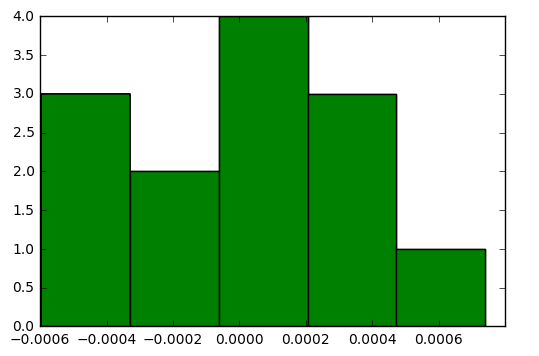

In [14]:
import matplotlib.pyplot as plt

plt.hist(residuals, bins = 5)
plt.show()

#### Our Dataset has only 13 observations, so it is difficult to make any interpretation.
#### The largest bin has only 4 observations but otherwise the plot looks normal.
#### So, we cannot reject the case that the residuals are normal. We will move forward with this linear model and look at the measures of statistical fit.

### Sum of Squares
#### SSE is one of the measures to evaluate linear regression models. It is the Sum of all the Residuals giving us the measure between the model's predicted and observed values.
#### RSS (Regression Sum of Squares) measures amount of explained variance which our model accounts for. 
#### A large RSS and small SSE are an indicator of a strong model.
#### TSS (Total Sum Squares) measures total amount of variation within the data.

In [19]:
import numpy as np

SSE = np.sum((y.values - yhat)**2)
print("SSE =", SSE)

RSS = np.sum((np.mean(y.values)-yhat)**2)
print("RSS =",RSS)

TSS = np.sum((y.values-np.mean(y.values))**2)
print("TSS =",TSS)

SSE = 1.92285714286e-06
RSS = 0.000158044835165
TSS = 0.000159967692308


### R-Squared
#### It is also called Coefficient of Determination and is a great measure of linear dependance.
#### It is a single number which tells us the % of variation in the target variable.
#### It tells us what % of the total variation of the data ou rmodel is accounting for. This value exists between 0 and 1.

In [21]:
SSE = np.sum((y.values-yhat)**2)
ybar = np.sum(y.values)
RSS = np.sum((ybar-yhat)**2)
TSS = np.sum((y.values-ybar)**2)
R2 = RSS/TSS
print("R-squared =",R2)

R-squared = 0.999999999884


#### We see that the R-squared value for our model is 0.988, accounting for 98.88% of the variation within the data.

### Coefficients of Linear Model
#### After defining our model, we would like to know what are the coefficients for its variables.
#### Once we know the coefficients, we can predict the lean of the tower in any future year.

In [25]:
print("Coefficients:")
print("\n",linearfit.params)

delta = linearfit.params.year * 15
print("Lean in the tower after 15 years (metres) =",delta)

Coefficients:

 const    1.123338
year     0.000932
dtype: float64
Lean in the tower after 15 years (metres) = 0.013978021978


### Variance of Coefficients
#### Variance of each of the coefficients is an important and powerful measure. It is known as s-squared (s^2).
#### Knowing the variance for year will tell us the number of meters the tower will lean each year. 

In [27]:
mean_year = pisa['year'].mean()
n = int(pisa.shape[0])

s2b1 = SSE/((n-2)*np.sum((pisa['year']-mean_year)**2))
print("Variance for year = ",s2b1)

Variance for year =  9.60468103325e-10


### Statistical Significance of Coefficients
#### Based on the Null-Alternative Hypothesis, where 
####       Null: The tower lean is not dependent on year
####       Alternative : The tower lean id dependant on year
#### Using T distribution, we can test out this Hypothesis.
#### t-statistic measures how many standard deviations the expected coefficient is from 0. The farther the t-statistic is from 0, the lower will be its probability

In [29]:
tstat = linearfit.params["year"]/np.sqrt(s2b1)

print("t-statistic for year parameter =",tstat)

t-statistic for year parameter = 30.0685846877


### the P-value
#### We can now test our coefficient. We will nedd the probability of beta1(symbol beta) to be different than 0 at a significance level.
#### If we have 95% significance level, that we are 95% certain that beta1 differs from 0.
#### We can do a 2-sided test: 1 which checks for probability of beta1 being 0 and the other for beta1 being not 0.
#### Based on our threshold value, we can decide if beta1 is 0 or not. Here it is 97.5%

In [36]:
from scipy.stats import t

pval = 0.975

df = pisa.shape[0] - 2
p = t.cdf(tstat, df=df)

beta1_test=pval<p

print("beta1 is 1 =",beta1_test)

beta1 is 1 = True


### Conclusion:
#### We can compute and interpret statistics often used to measure Linear Models.